In [8]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sort import Sort
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation
from IPython.display import HTML

%matplotlib inline
%load_ext line_profiler
%load_ext cython

In [9]:
# all train
if not os.path.exists('output'):
    os.makedirs('output')
colours = np.random.rand(32, 3) #used only for display

In [18]:
def run(colours, display=False, total_time=0.0, total_frames=0):
    # all train
    sequences = ['PETS09-S2L1', 'TUD-Campus', 'TUD-Stadtmitte', 'ETH-Bahnhof', 'ETH-Sunnyday', 'ETH-Pedcross2', 'KITTI-13', 'KITTI-17', 'ADL-Rundle-6', 'ADL-Rundle-8', 'Venice-2']
    phase = 'train'
    if(display):
        if not os.path.exists('mot_benchmark'):
            print('\n\tERROR: mot_benchmark link not found!\n\n        Create a symbolic link to the MOT benchmark\n        (https://motchallenge.net/data/2D_MOT_2015/#download). E.g.:\n\n        $ ln -s /path/to/MOT2015_challenge/2DMOT2015 mot_benchmark\n\n')
            exit()
        fig, ax = plt.subplots()
    
    if not os.path.exists('output'):
        os.makedirs('output')
    
    for seq in sequences:
        mot_tracker = Sort() #create instance of the SORT tracker
        seq_dets = np.loadtxt('data/%s/det.txt'%(seq), delimiter=',').astype('float32') #load detections
        with open('output/%s.txt'%(seq), 'w') as out_file:
            print("Processing %s."%(seq))
            for frame in range(int(seq_dets[:, 0].max())):
                frame += 1 #detection and frame numbers begin at 1
                dets = seq_dets[seq_dets[:, 0]==frame, 2:7]
                dets[:, 2:4] += dets[:, 0:2] #convert to [x1, y1, w, h] to [x1, y1, x2, y2]
                total_frames += 1

                fn = 'mot_benchmark/%s/%s/img1/%06d.jpg'%(phase, seq, frame)
                im =io.imread(fn)
                ax.imshow(im)
                plt.title(seq + ' Tracked Targets')

                start_time = time.time()
                trackers = mot_tracker.update(dets)
                cycle_time = time.time() - start_time
                total_time += cycle_time

                for d in trackers:
                    print('%d, %d, %.2f, %.2f, %.2f, %.2f, 1, -1, -1, -1'%(frame, d[4], d[0], d[1], d[2]-d[0], d[3]-d[1]), file=out_file)
                    if(display):
                        d = d.astype(np.int32)
                        ax.add_patch(patches.Rectangle((d[0], d[1]), d[2]-d[0], d[3]-d[1], fill=False, lw=3, ec=colours[d[4]%32, :]))
                        ax.set_adjustable('box-forced')
                if(display):
                    plt.axis('off')
                    fig.savefig(f'{frame:05d}.jpg')
                    ax.cla()
        break
        
#     print("Total Tracking took: %.3f for %d frames or %.1f FPS"%(total_time, total_frames, total_frames/total_time))

Processing PETS09-S2L1.


C:\Users\kruithofmc\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


KeyboardInterrupt: 

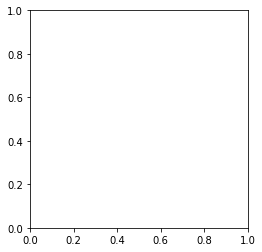

In [19]:
# lprun -f KalmanBoxTracker.predict -f KalmanBoxTracker.__init__ -f Sort.update -f associate_detections_to_trackers -f run run(total_time, total_frames)
run(colours, display=True)

TypeError: set_data() missing 1 required positional argument: 'A'